In [1]:
#%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.linalg import svd
import matplotlib as mpl
import time
import sys
from math import factorial
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=30)
mpl.rc('ytick',labelsize=30)

### Linestyles ###
colors={'red':(241/255.,88/255.,84/255.),\
        'orange':(250/255,164/255.,58/255.),\
        'pink':(241/255,124/255.,176/255.),\
        'brown':(178/255,145/255.,47/255.),\
        'purple':(178/255,118/255.,178/255.),\
        'green':(96/255,189/255.,104/255.),\
        'darkgreen':(70/255,165/255.,80/255.),\
        'blue':(93/255,165/255.,218/255.),\
        'darkblue':(70/255,140/255.,195/255.),\
        'yellow':(222/255., 207/255., 63/255),\
        'black':(0.,0.,0.)}
collab = ['brown','green','blue','pink',"orange",'black']
linewidth = [2,2,3,3,4]
linestyle = ['solid','dashed','dashdot','dotted','solid']

/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


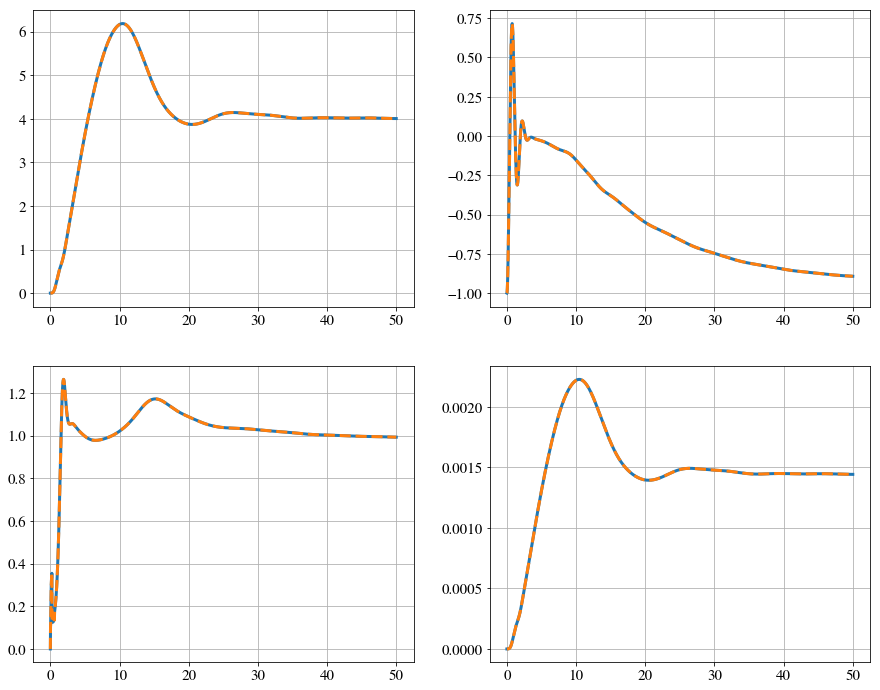

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from io import BytesIO
import matplotlib as mpl
mpl.rc('xtick',labelsize=15)
mpl.rc('ytick',labelsize=15)


def conv(x):
    return x.replace('+-', '-').encode()

Data1 = np.genfromtxt((conv(x) for x in open("./Data/JC10.txt")),dtype=complex)
#Data1o = np.genfromtxt((conv(x) for x in open("../JC+fb/Data/JC+fb_gL=6283p1000_gR=6283p1000_g=31p10_phi=10p10pi_initind=4_ome=0p10_omc=0p10_L=50-2.txt")),dtype=complex)
#Data1o = np.genfromtxt((conv(x) for x in open("../Data/Cluster/evol/JC+fb_gL=20p1000_gR=80p1000_g=10p10_phi=0p10pi_initind=0_ome=20p10_omc=0p10_L=20.txt")),dtype=complex)
Data1o = np.genfromtxt((conv(x) for x in open("../Data/JC+fb_gL=20p1000_gR=80p1000_g=10p10_phi=0p10pi_initind=0_ome=20p10_omc=0p10_L=20.txt")),dtype=complex)


t_1 = Data1[:,0]
norm_1 = Data1[:,1]
exc_1 = Data1[:,2]
gr_1 = Data1[:,3]
cav_1 = Data1[:,4]
g2c_1 = Data1[:,5]
g2_1 = Data1[:,6]
NB_1 = Data1[:,7]
NBout_1 = Data1[:,8]
to_1 = Data1o[:,0]
normo_1 = Data1o[:,1]
exco_1 = Data1o[:,2]
gro_1 = Data1o[:,3]
cavo_1 = Data1o[:,4]
g2co_1 = Data1o[:,5]
g2o_1 = Data1o[:,6]
NBo_1 = Data1o[:,7]
NBouto_1 = Data1o[:,8]
#plt.xlim(0,4)
#plt.ylim (-0.005,0.145)
fig,ax = plt.subplots(2,2,figsize = (15,12))
ax[0][0].plot(t_1,cav_1,lw=3)
ax[0][0].plot(to_1,cavo_1,ls="--",lw=3)
ax[0][0].grid(True)
ax[0][1].plot(t_1,exc_1-gr_1,lw=3)
ax[0][1].plot(to_1,exco_1-gro_1,ls="--",lw=3)
ax[0][1].grid(True)
ax[1][0].plot(t_1,g2_1,lw=3)
ax[1][0].plot(to_1,g2o_1,ls="--",lw=3)
ax[1][0].grid(True)
ax[1][1].plot(t_1,NB_1,lw=3)
ax[1][1].plot(to_1,NBo_1,ls="--",lw=3)
ax[1][1].grid(True)


In [1]:
import sys
print(sys.version)

3.5.4 |Continuum Analytics, Inc.| (default, Aug 14 2017, 13:41:13) [MSC v.1900 64 bit (AMD64)]
